# Importing

In [1]:
import numpy as np
import pandas as pd
#import warnings
#warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score,roc_curve,auc,silhouette_score,homogeneity_score,mean_squared_error,log_loss
from sklearn.preprocessing import label_binarize
import os
import seaborn as sns

# reading train Data

In [2]:
train_data=pd.read_csv("../Data/fashion-mnist_train.csv")

train_data.shape 


(60000, 785)

# define x_train and y_train

In [3]:
X_train=train_data[train_data.columns[1:]]

y_train=train_data["label"]

X_train.head()

#y_train.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# reading test data

In [4]:
test_data=pd.read_csv("H:\\Anconada Ml\\fashion-mnist_test.csv")
test_data.shape

(10000, 785)

# define X_test,y_test

In [5]:
X_test=test_data[test_data.columns[1:]]

y_test=test_data["label"]

X_test.head()

#y_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# visualization 

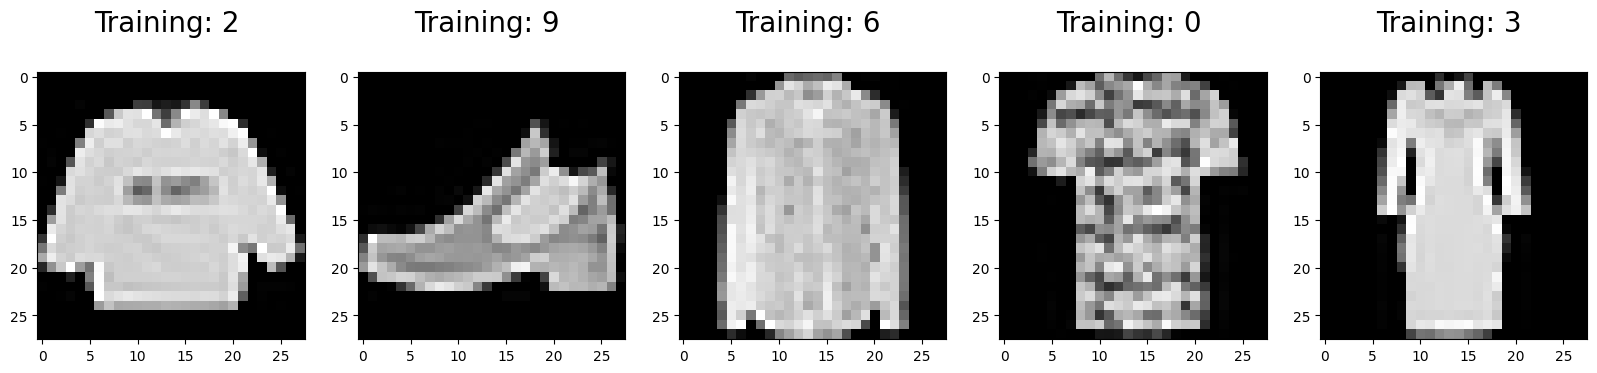

In [6]:
train_img=X_train.to_numpy()
train_label=y_train.to_numpy()  
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(train_img[0:5],train_label[0:5])):
    plt.subplot(1,5,index+1)
    
    plt.imshow(np.reshape(image,(28,28)),cmap=plt.cm.gray)
    plt.title('Training: %i \n'%label,fontsize=20)

# define labels

In [7]:
 fashion_mnist_classes = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8:"Bag",
    9: "Ankle boot",
}

# visualization

In [8]:
def display_image(features,actual_label):
    print("Actual label:",fashion_mnist_classes[actual_label])
    plt.imshow(features.reshape(28,28))

Actual label: Coat


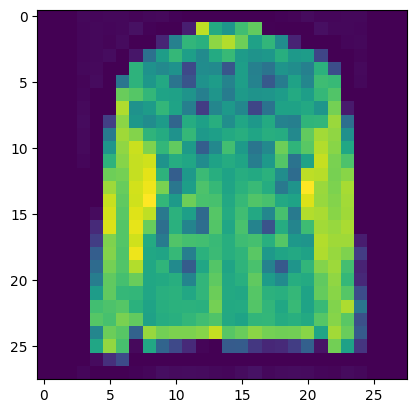

In [9]:
display_image(X_train.loc[5].values,y_train.loc[5])

Actual label: Ankle boot


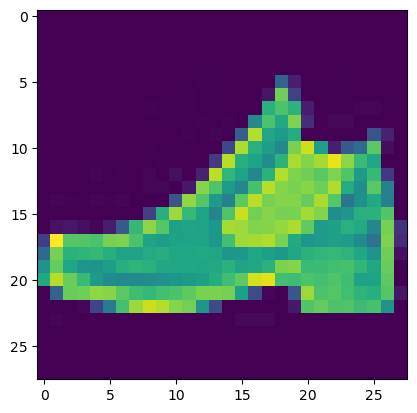

In [45]:
display_image(X_train.loc[1].values,y_train.loc[1])

# feature scaliing

In [10]:
#X_train=X_train/255.# this for feature scaling
scale=StandardScaler()
X_test=scale.fit_transform(X_test)
X_train=scale.fit_transform(X_train)
#X_train.head()
#X_test=X_test/255.
#X_test.head()

# logistic Regression model

In [11]:
#print("ggg")
# make logestic regression

logistic_model=LogisticRegression(max_iter= 2000,C=.0005,solver='lbfgs' , verbose=1)

# fit the model

logistic_model.fit(X_train,y_train)


LogisticRegression(C=0.0005, max_iter=2000, verbose=1)

In [12]:
y_pred=logistic_model.predict(X_test)
y_pred[:5]

array([0, 1, 2, 6, 4], dtype=int64)

In [13]:
# Actual vs prediction in logistic regression
# y_test vs y_pred remeber you should convert dataframe to numpy array to make this
image_test_labels=y_test.to_numpy()
pred_results=pd.DataFrame({'Actual':image_test_labels,"Prediction":y_pred})
pred_results.head(10)

,Actual,Prediction
0,0,0
1,1,1
2,2,2
3,2,6
4,3,4
5,2,6
6,8,8
7,6,6
8,5,5
9,0,0


# Accuracy

In [14]:
accuracy_score(y_test,y_pred)

0.8502

In [15]:
recall_score(y_test, y_pred,average="micro")

0.8502

In [16]:
precision_score(y_test,y_pred,average="micro")

0.8502

In [18]:
 score=classification_report(y_test, y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.77      0.77      0.77      1000
           3       0.85      0.89      0.87      1000
           4       0.78      0.81      0.79      1000
           5       0.91      0.91      0.91      1000
           6       0.66      0.59      0.62      1000
           7       0.89      0.89      0.89      1000
           8       0.95      0.94      0.95      1000
           9       0.91      0.93      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# confusion matrix

In [24]:
confusion_matrix_logistic=confusion_matrix(y_test, y_pred)
print(confusion_matrix_logistic)

[[809   5  15  55   0   6  96   1  12   1]
 [  2 964   6  20   1   0   7   0   0   0]
 [ 12   1 765  10 118   1  80   0  13   0]
 [ 30  15  17 889  21   2  25   0   1   0]
 [  0   0  75  32 809   1  81   0   2   0]
 [  2   0   0   1   0 912   0  55   8  22]
 [159   6 105  34  87   2 590   0  17   0]
 [  0   0   0   0   0  47   0 889   0  64]
 [  2   1   5  10   3   8  20   5 944   2]
 [  0   0   0   0   0  24   0  45   0 931]]


# visualization for confusion matrix

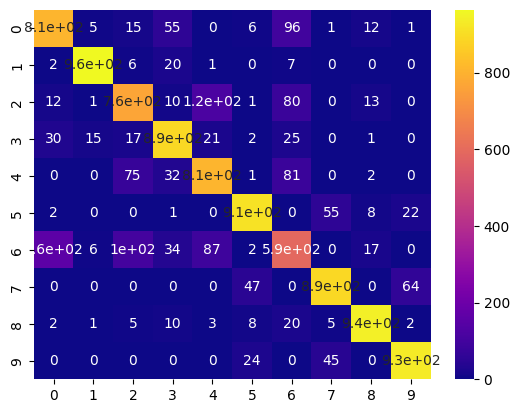

In [26]:
sns.heatmap(confusion_matrix_logistic,annot = True , cmap = 'plasma')# confustion matrix graph
plt.show()

# Roc Curve

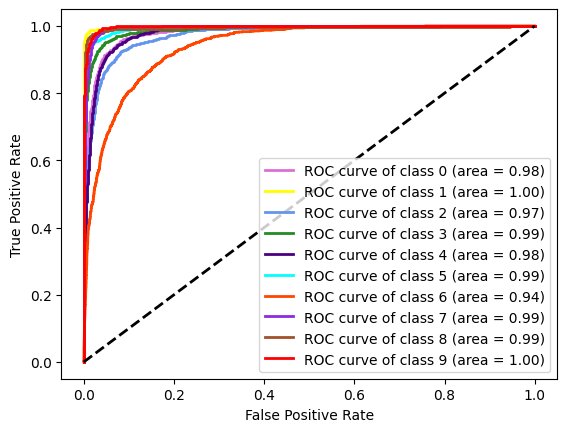

In [28]:
def plt_roc(model,test_x,test_y):

    y_score = model.predict_proba(test_x)
    test_y = label_binarize(test_y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    n_classes = 10

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
     fpr[i], tpr[i], _ = roc_curve(test_y[:, i], y_score[:, i])
     roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(test_y.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    lw = 2
   
    colors = ['Orchid', 'Yellow', 'cornflowerblue', 'ForestGreen', 'Indigo','Cyan', 'OrangeRed', 'BlueViolet', 'Sienna', 'Red']
    for i, color in zip(range(n_classes), colors):plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    #k -> black, -- -> dashed, [0,1],[0,1] -> diagonal, lw-> line width

plt_roc(model=logistic_model,test_x = X_test,test_y = y_test)  

# KMean Model

In [30]:
# kMean is unsupervised learning (clustering)
k=10 

kMeans_model=KMeans(n_clusters=k,init="k-means++",n_init=10, random_state=42)

kMeans_model.fit(X_train)


KMeans(n_clusters=10, n_init=10, random_state=42)

In [31]:
kmean_centroid=kMeans_model.cluster_centers_
kmean_centroid # there is clusters

array([[-9.50487946e-03, -2.26930300e-02, -2.89069199e-02, ...,
        -1.58245670e-01, -9.14318108e-02, -3.30455685e-02],
       [ 8.75880783e-03,  1.20883763e-01,  1.63155061e-01, ...,
        -5.62216341e-02,  8.64919606e-03,  5.52179013e-02],
       [ 8.57124750e-03,  2.94111541e-02, -1.56041496e-02, ...,
         7.72137307e-01,  7.60124034e-01,  2.51770592e-01],
       ...,
       [ 1.00214914e-02, -9.04830469e-03, -1.82104174e-02, ...,
        -8.34922391e-04,  4.11011296e-02,  7.08624746e-03],
       [-9.50487946e-03,  8.91253631e-05, -2.38557189e-02, ...,
        -1.57842235e-01, -9.06126846e-02, -3.30455685e-02],
       [ 7.31196318e-03, -9.47276242e-03, -1.52281557e-02, ...,
         4.59737852e-01,  4.12812322e-01,  2.57770715e-01]])

# visualization kmean centroid

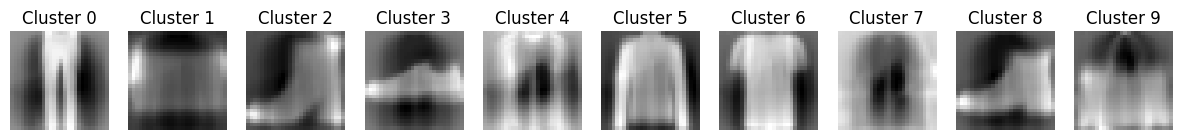

In [35]:
n_clusters=10
fig, ax = plt.subplots(1, n_clusters, figsize=(15, 3))

for i in range(n_clusters):
    center_image = kMeans_model.cluster_centers_[i].reshape(28, 28)  # Reshape to original dimensions
    ax[i].imshow(center_image, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'Cluster {i}')

plt.show()

In [36]:
y_kmean_pred=kMeans_model.predict(X_test)
y_kmean_pred[:5]

array([6, 0, 7, 4, 0])

In [42]:
image_test_labels=y_test.to_numpy()
pred_results=pd.DataFrame({'Actual':image_test_labels,"Prediction":y_kmean_pred})
pred_results.head(10)

,Actual,Prediction
0,0,6
1,1,0
2,2,7
3,2,4
4,3,0
5,2,4
6,8,1
7,6,4
8,5,7
9,0,4
